In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset 

In [16]:
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns = iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

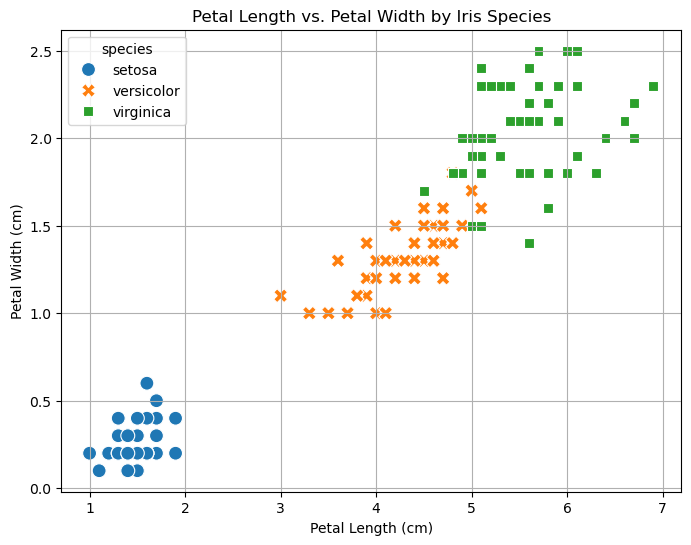

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue ='species', style='species', s=100)
plt.title('Petal Length vs. Petal Width by Iris Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid(True)
plt.show()

# Prepare Data for training 

In [21]:
features = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
target = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [24]:
iris_classifier = DecisionTreeClassifier(random_state=42)
iris_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Testing

## evaluate the model 

Accuracy 1.0
Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



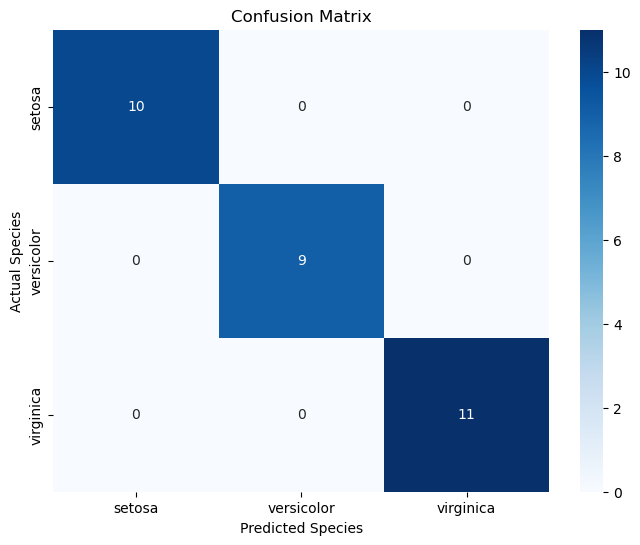

In [36]:
predicted_species = iris_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predicted_species)
print('Accuracy',accuracy)

print('Classification report:\n', classification_report(y_test, predicted_species))

conf_matrix = confusion_matrix(y_test, predicted_species, labels=['setosa', 'versicolor', 'virginica'])
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()


In [28]:
new_flower = pd.DataFrame({
    'sepal length (cm)': [5.0],
    'sepal width (cm)': [3.4],
    'petal length (cm)': [3.5],
    'petal width (cm)': [2.2]
})
new_prediction = iris_classifier.predict(new_flower)
print(new_prediction[0])

virginica
